In [77]:
# Data and Math
import numpy as np
import pandas as pd
import math
import statsmodels.api as sm

from pandas import Series, DataFrame

# Machine Learning library
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Visualizing
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Checklist
import markdown
#html = markdown.markdown(source, extensions=['markdown_checklist.extension'])

The source of data:

In [2]:
# Print the source of the dataset
print(sm.datasets.fair.SOURCE)


Fair, Ray. 1978. "A Theory of Extramarital Affairs," `Journal of Political
Economy`, February, 45-61.

The data is available at http://fairmodel.econ.yale.edu/rayfair/pdf/2011b.htm



Description of the dataset:

In [3]:
# Print long description of the dataset
print(sm.datasets.fair.DESCRLONG)

Extramarital affair data used to explain the allocation
of an individual's time among work, time spent with a spouse, and time
spent with a paramour. The data is used as an example of regression
with censored data.


Based on the data [sourcepage on statmodels website](https://www.statsmodels.org/stable/datasets/generated/fair.html), there are 6366 observations and 9 variables, the variable definitions are as follows:

In [4]:
# Print the available notes of the dataset
print(sm.datasets.fair.NOTE)

::

    Number of observations: 6366
    Number of variables: 9
    Variable name definitions:

        rate_marriage   : How rate marriage, 1 = very poor, 2 = poor, 3 = fair,
                        4 = good, 5 = very good
        age             : Age
        yrs_married     : No. years married. Interval approximations. See
                        original paper for detailed explanation.
        children        : No. children
        religious       : How relgious, 1 = not, 2 = mildly, 3 = fairly,
                        4 = strongly
        educ            : Level of education, 9 = grade school, 12 = high
                        school, 14 = some college, 16 = college graduate,
                        17 = some graduate school, 20 = advanced degree
        occupation      : 1 = student, 2 = farming, agriculture; semi-skilled,
                        or unskilled worker; 3 = white-colloar; 4 = teacher
                        counselor social worker, nurse; artist, writers;
          

There is only a note on the values of affairs. Based on the [original article](https://fairmodel.econ.yale.edu/rayfair/pdf/1978a200.pdf), the value of the affairs which show the spent time in extramarital affairs, is equivalent to $0$ or $\frac{q_1q_2}{v_3}$, where  
$q_1$ states if scince marriage have had sexual with man other than husband, with how many different men:  
> $q_1$: 1.0 = 1, 3.5 = 2-5, 8.0 = 6-10, and 12 = more than 10.  

$q_2$ states approximate number of times had sexual relations whit each man
> $q_2$: 1.0 = once, 3.5 = 2-5, 8.0 = 6-10, 12 = more than 10, and 5.6 = it varied greatly from partner to partner.  

and  
> $v_3$: the number of years married.

### Load data as panda object

In [5]:
# Load data as dataframe
df = sm.datasets.fair.load_pandas().data

In [6]:
df

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666
...,...,...,...,...,...,...,...,...,...
6361,5.0,32.0,13.0,2.0,3.0,17.0,4.0,3.0,0.000000
6362,4.0,32.0,13.0,1.0,1.0,16.0,5.0,5.0,0.000000
6363,5.0,22.0,2.5,0.0,2.0,14.0,3.0,1.0,0.000000
6364,5.0,32.0,6.0,1.0,3.0,14.0,3.0,4.0,0.000000


In [7]:
# Function to check if had/hadn't affair
def check_affair(x):
    if x != 0:
        return 1
    else:
        return 0

# Apply the "check_affair" function to the dataframe
df['had_affair'] = df['affairs'].apply(check_affair)

In [8]:
df

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,had_affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1
...,...,...,...,...,...,...,...,...,...,...
6361,5.0,32.0,13.0,2.0,3.0,17.0,4.0,3.0,0.000000,0
6362,4.0,32.0,13.0,1.0,1.0,16.0,5.0,5.0,0.000000,0
6363,5.0,22.0,2.5,0.0,2.0,14.0,3.0,1.0,0.000000,0
6364,5.0,32.0,6.0,1.0,3.0,14.0,3.0,4.0,0.000000,0


<AxesSubplot:xlabel='age', ylabel='Count'>

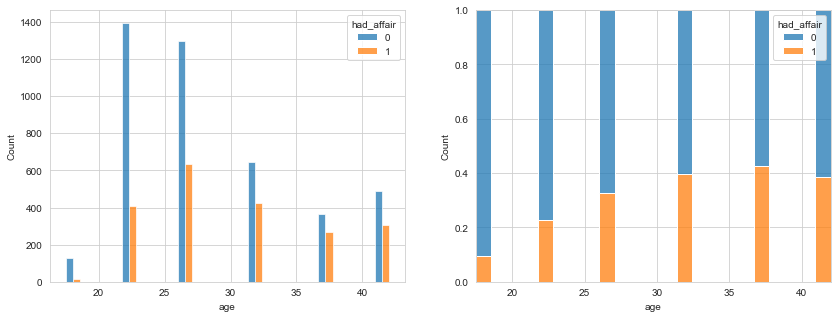

In [9]:
# Plot number of affairs versus one of the parameters, here age with/without normalization
f, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.histplot(data=df, x='age', hue='had_affair', multiple='dodge', ax=axes[0])
sns.histplot(data=df, x='age', hue='had_affair', multiple='fill' , ax=axes[1])

The above left plot shows the counts of having extramarital affairs (EA) by age. The right one is the percentage in respect to the sample population of each case (here age). So definitely, it is more releiable and gives a better insight of the effect of the parameter.  

Therefore, from now on I will continue with the normalized percentage one.

<AxesSubplot:xlabel='educ', ylabel='Count'>

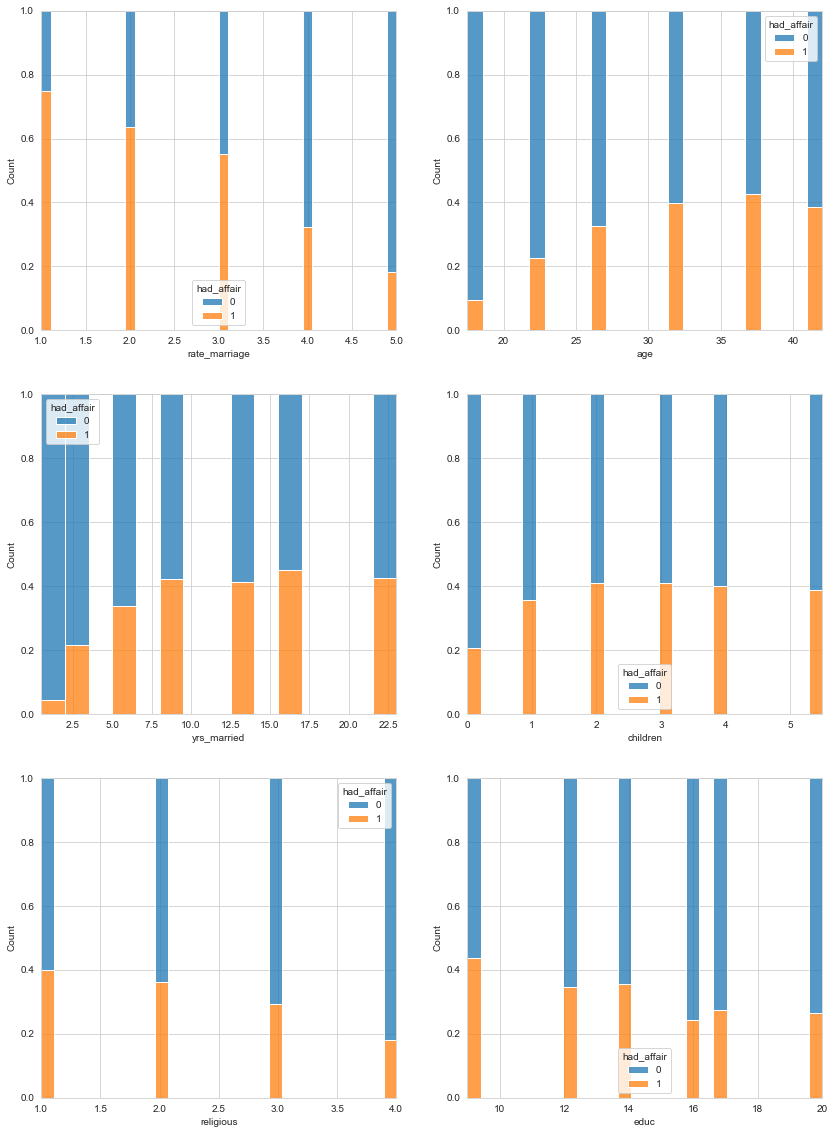

In [10]:
# Plot normalized number of affairs versus different parameters
f, axes = plt.subplots(3, 2, figsize=(14, 20))
sns.histplot(data=df, x='rate_marriage', hue='had_affair', multiple='fill', ax=axes[0,0])
sns.histplot(data=df, x='age', hue='had_affair', multiple='fill', ax=axes[0,1])
sns.histplot(data=df, x='yrs_married', hue='had_affair', multiple='fill', ax=axes[1,0])
sns.histplot(data=df, x='children', hue='had_affair', multiple='fill', ax=axes[1,1])
sns.histplot(data=df, x='religious', hue='had_affair', multiple='fill', ax=axes[2,0])
sns.histplot(data=df, x='educ', hue='had_affair', multiple='fill', ax=axes[2,1])
#sns.histplot(data=df, x='occupation', hue='had_affair', multiple='fill', ax=axes[3,0])
#sns.histplot(data=df, x='occupation_husb', hue='had_affair', multiple='fill', ax=axes[3,1])

Based on the above diagrams we can conclude:
- The likely of EA, decreases by increasing how they rate their marriage. Which definitely reasonable. 
- The likely of EA, interestingly, increases by increasing age, years of marriage and this is why it is also correlates with the number of children, which normally increases by time. __It would be interesting if one can find a way to check which one is the main one, the years after marriage or the age__.
- Religious cause reduction in EA. Education also but not as strong as religious.
- Interestingly, the occupation of the wife has a small effect in EA, maybe due to more extra family connection. However, this is not the case for the occupation of husband.

If one want to sort based on the effect:
- Happiness of marriage
- Age or years of marriage
- Religious
- Education
- Wife occupation

### Spent Affair Time

In this section I will just look closely at the part of the sample dataset that had an affair and study the distribution of the spent affair time, $\frac{q_1q_2}{v3}$, which defined preivously, in that group.

<AxesSubplot:xlabel='educ', ylabel='affairs'>

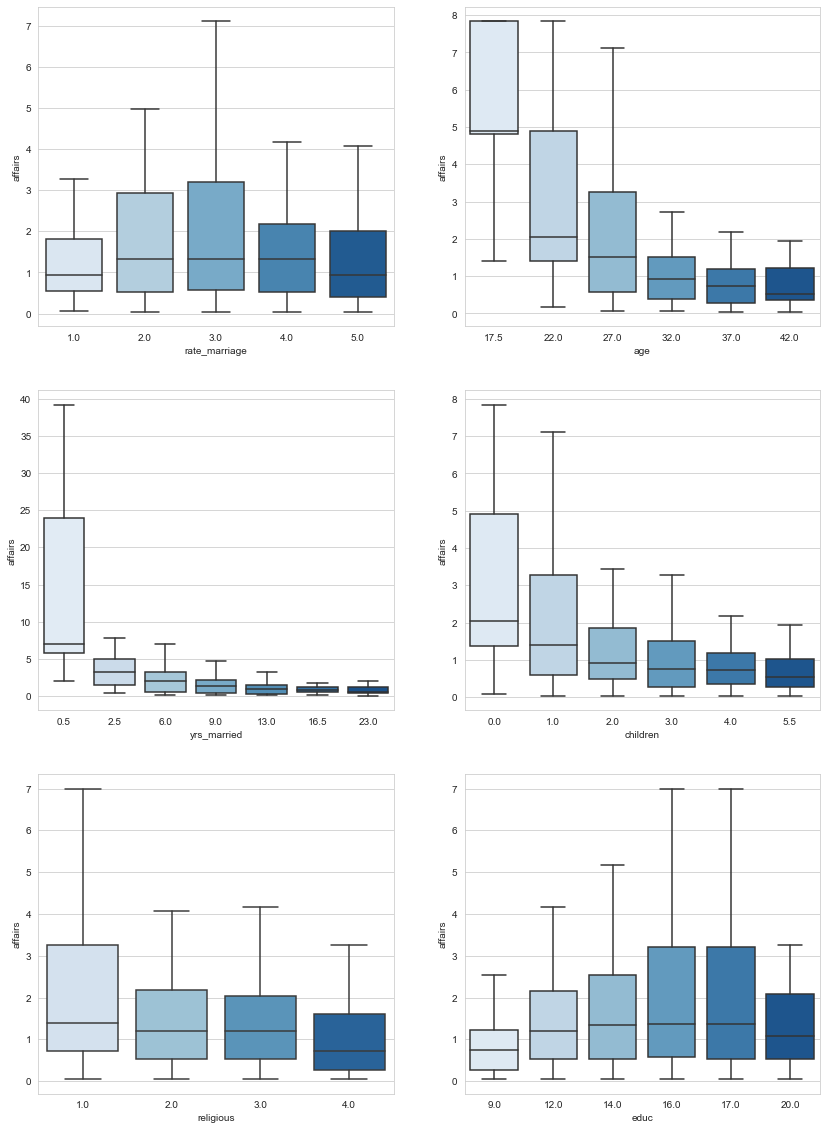

In [11]:
# Plot distribution of spent time in extramarirtal affair by different parameters, only inside the group that had affair
f, axes = plt.subplots(3, 2, figsize=(14, 20))
sns.boxplot(data=df[(df['affairs']!=0)], x='rate_marriage', y='affairs', palette='Blues', showfliers = False, ax=axes[0,0])
sns.boxplot(data=df[(df['affairs']!=0)], x='age', y='affairs', palette='Blues', showfliers = False, ax=axes[0,1])
sns.boxplot(data=df[(df['affairs']!=0)], x='yrs_married', y='affairs', palette='Blues', showfliers = False, ax=axes[1,0])
sns.boxplot(data=df[(df['affairs']!=0)], x='children', y='affairs', palette='Blues', showfliers = False, ax=axes[1,1])
sns.boxplot(data=df[(df['affairs']!=0)], x='religious', y='affairs', palette='Blues', showfliers = False, ax=axes[2,0])
sns.boxplot(data=df[(df['affairs']!=0)], x='educ', y='affairs', palette='Blues', showfliers = False, ax=axes[2,1])
#sns.boxplot(data=df[(df['affairs']!=0)], x='occupation', y='affairs', palette='Blues', showfliers = False, ax=axes[3,0])
#sns.boxplot(data=df[(df['affairs']!=0)], x='occupation_husb', y='affairs', palette='Blues', showfliers = False, ax=axes[3,1])

The results are interesting, especially for the cases which the behavior is in contrast with the number of having affair. For example, previously, we found that by increasing age (and so the same for yrs of marrriage and number of children), the number of women that had extramarital affairs increases. However, if we look at the total spent time in that group we find that the average time reduces. The summary of trends based on the above diagrams:

- Considerable reduction of spent time by age (yrs of marriage, and number of children).
- Reduction of spent time by religious
- Interestingly increasing the spent time by education. But it should be mentioned that the impact is not so high and just maybe we can think of a threshold in education and after that level there is no any specific differences.
- And it seems that occupation and interesting the rate of marriage didn't have any strong impact on the time spent.

I emphasize that the diagrams in this section was just from that group that had an affair and the spent time distribution studied only in this group. On the word, the samples with no affiar (so zero spent time) were out of this study.

### Preparing the Data and Dummy Variables

Amongst the variables, "occupation" and "husband occupation" variables are the _categorical variables_, as the values assined to them just show a specific category, and therefor, there is no 1.5 or any other decimal value for these columns. To make it meaningful for regression analysis, there is a built-in method in pandas to get the dummy variable and convert them to new well organized dataframe.

In [20]:
# Create new dataframe for catecorigal variables
occ_dummy = pd.get_dummies(df['occupation'])
occh_dummy = pd.get_dummies(df['occupation_husb'])

# Assign a collumn names to created dummy dataframes 
# Note: occupation and occupation_husb each contanied 6 categories
occ_dummy.columns = ['occ1','occ2','occ3','occ4','occ5','occ6']
occh_dummy.columns = ['occh1','occh2','occh3','occh4','occh5','occh6']

# Concatenate the occ and occh dummy dataframes together
dummies = pd.concat([occ_dummy,occh_dummy],axis=1)

# Show the final dummies dataframe
dummies

,occ1,occ2,occ3,occ4,occ5,occ6,occh1,occh2,occh3,occh4,occh5,occh6
0,0,1,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,1,0
3,0,0,0,0,1,0,0,0,0,0,1,0
4,0,0,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6361,0,0,0,1,0,0,0,0,1,0,0,0
6362,0,0,0,0,1,0,0,0,0,0,1,0
6363,0,0,1,0,0,0,1,0,0,0,0,0
6364,0,0,1,0,0,0,0,0,0,1,0,0


Now preparing X and Y data for regression analysis:

In [28]:
# Set X dataframe without categorical variables and also the traget (had_affair)
X = df.drop(['occupation','occupation_husb','had_affair','affairs'],axis=1)

# Concatenate the X with the dummy variables (dummies dataframe)
X = pd.concat([X,dummies],axis=1)

# Show the Result
X

,rate_marriage,age,yrs_married,children,religious,educ,occ1,occ2,occ3,occ4,occ5,occ6,occh1,occh2,occh3,occh4,occh5,occh6
0,3.0,32.0,9.0,3.0,3.0,17.0,0,1,0,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,0,0,1,0,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,0,0,1,0,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0,0,0,0,1,0,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,0,0,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6361,5.0,32.0,13.0,2.0,3.0,17.0,0,0,0,1,0,0,0,0,1,0,0,0
6362,4.0,32.0,13.0,1.0,1.0,16.0,0,0,0,0,1,0,0,0,0,0,1,0
6363,5.0,22.0,2.5,0.0,2.0,14.0,0,0,1,0,0,0,1,0,0,0,0,0
6364,5.0,32.0,6.0,1.0,3.0,14.0,0,0,1,0,0,0,0,0,0,1,0,0


I dropped _occupation_, _occupation_husb_ as we would have add them latter through dummies dataframe. 
I dropped also _had_affair_ and also _affair_ as they are actually the target.

In [53]:
# Set target
Y = df.had_affair

# Show result
Y

0       1
1       1
2       1
3       1
4       1
       ..
6361    0
6362    0
6363    0
6364    0
6365    0
Name: had_affair, Length: 6366, dtype: int64

#### Take care of multicolinearity
We should care the high correlation in dummy variables as the way we made the final dataframes, they are highly correlated. To avoid multicolinearity we drop one column from each dummy dataframe here for example occ1 and occh1.

In [32]:
# Dropping one column of each dummy set to avoid multicollinearity
X = X.drop('occ1',axis=1)
X = X.drop('occh1',axis=1)

# Check the result
X

,rate_marriage,age,yrs_married,children,religious,educ,occ2,occ3,occ4,occ5,occ6,occh2,occh3,occh4,occh5,occh6
0,3.0,32.0,9.0,3.0,3.0,17.0,1,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,0,1,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,0,1,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0,0,0,1,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6361,5.0,32.0,13.0,2.0,3.0,17.0,0,0,1,0,0,0,1,0,0,0
6362,4.0,32.0,13.0,1.0,1.0,16.0,0,0,0,1,0,0,0,0,1,0
6363,5.0,22.0,2.5,0.0,2.0,14.0,0,1,0,0,0,0,0,0,0,0
6364,5.0,32.0,6.0,1.0,3.0,14.0,0,1,0,0,0,0,0,1,0,0


### Regression Analysis

Based on the shape of data which the target is only can be 0 or 1, logistic regression method is used.

In [65]:
# Create a LinearRegression Object
logreg = LogisticRegression(max_iter=2000)

# Applying logistic Regression
logreg.fit(X,Y)

# Check the accuracy of the model
logreg.score(X,Y)

0.7262016965127238

Making a dataframe of all features and their correspoinding estimated coefficients obtained from the logistic regression.

In [67]:
# Make a dataframe from the name of the features
coeff_df = DataFrame(X.columns)
coeff_df.columns = ['Features']

# Add estimated coefficients from the logistic regression as a new column
coeff_df['Coefficient Estimate'] = pd.Series(np.ravel(logreg.coef_))

# Show the dataframe including features and corresponding estimated coeff
coeff_df

,Features,Coefficient Estimate
0,rate_marriage,-0.708905
1,age,-0.060699
2,yrs_married,0.107630
3,children,0.016163
4,religious,-0.374954
5,educ,-0.001075
6,occ2,0.048953
7,occ3,0.363917
8,occ4,0.131611
9,occ5,0.710180


The positive values corresponds to increasing the likelihood of having an affair and vice versa.  

These data are in good agreement with the observations and conclusions we had from the graphs, previously.

### Training and Validating Data
The correct way to pick up data from the entire sample for training either validation is random selection. For this purpose one can use built in function in scikit learn called _train_testsplit, which is accessible via _modelselection method.

In [71]:
# Setup train and validation (test) datasets
x_train, x_test, y_train, y_test = train_test_split(X,Y)

# Check the number of train and test samples chosen by default
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(4774, 16) (1592, 16) (4774,) (1592,)


In [74]:
# Fit the model to training set
logreg.fit(x_train, y_train)

LogisticRegression(max_iter=2000)

Now we can predict classifcation labels for the test set and extract the accuracy of the fitting and so predicting.

In [84]:
# Prediction of both training and validation datasets
predict_train = logreg.predict(x_train)
predict_test = logreg.predict(x_test)

# Compare the predicted classes to the actual classes
print('The accuracy of the train set is {:.2f} %'.format(accuracy_score(y_train, predict_train)*100))
print('The accuracy of the test set is {:.2f} %'.format(accuracy_score(y_test, predict_test)*100))

The accuracy of the train set is 72.69 %
The accuracy of the test set is 72.11 %


### Todo List



* [ ] Find a way to check that which of the age either years after marriage has a greater role in EA.